<a href="https://colab.research.google.com/github/Camipinto/Laboratorio-de-Programacion-Cientifica-para-Ciencia-de-Datos/blob/main/Lab07/Lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Laboratorio 7: Aprendizaje Supervisado 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Matías Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Guerra

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: **Camila Pinto L.**
- Nombre de alumno 2: **Camilo Ramírez C.**


### **Link de repositorio de GitHub:** https://github.com/Camilormz/MDS7202-labs

## Temas a tratar

- Aprendizaje Supervisado
- Flujos de datos a través de `Pipelines`.

## Reglas

- Fecha de entrega: TBD
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

## Objetivos principales del laboratorio

- Comprender el funcionamiento de clasificadores/regresores.
- Generar múltiples modelos predictivos.
- Comprender las ventajas de crear modelos en pipeline vs hacer las operaciones a mano.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre `DataFrames`.

### Importamos librerias utiles 😸

In [ ]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#Libreria para plotear
!pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


https://www.kaggle.com/antoinekrajnc/soccer-players-statistics

# 1. Predicciones Futboleras

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones. 

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con los csv `statsplayers.csv` y `salarios.pickle`, donde deberán aplicar algoritmos de de aprendizaje supervisado (clasificación y regresión) en base a características que describen de jugadores de futbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
# try:
#     from google.colab import drive
#     drive.mount("/content/drive")
#     path = 'Dirección donde tiene los archivos en el Drive'
# except: 
print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [ ]:
%%capture
# Descarga directa de los datos desde Internet
!wget -O stats_players.csv https://drive.google.com/u/0/uc?id=1TEWD00aWDfiUec5Q0vvNbT4fZ0L6MGCU&export=download
!wget -O sueldos.csv https://drive.google.com/u/0/uc?id=1z8A4lGzZJUY5YRJqdYeao5jPSIA6V0ol&export=download

In [ ]:
df_players = pd.read_csv('stats_players.csv')
df_players

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,34,48,15,23,14,12,13,12,24,12


## 1.1 Predicción de Seleccionados Nacionales 

Como primera tarea, Renacín, intrigado por la posibilidad de saber qué tan reconocido es un jugador, le consulta a su equipo si es posible predecir si un jugador será o no seleccionado nacional a partir de sus estadísticas en el juego. 

<p align="center">
  <img src="https://thumbs.gfycat.com/ThornyFrankFoxhound-size_restricted.gif" width="500">
</p>

### 1.1.1 Generación de Labels para la Clasificación [Sin Puntaje]


Primero comience generando las labels para la clasificación. Para esto, trabaje sobre el atributo ```National_Position``` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. 

Hecho esto, ¿Cuantos ejemplos por cada clase se tienen? Comente lo que observa.



**Respuesta:**

In [ ]:
df_players["Selection_Label"] = (
    ~df_players["National_Position"].isnull()
).astype(int)

df_players

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,Selection_Label
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,95,85,92,93,90,81,76,85,88,1
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,68,71,85,95,88,89,90,74,85,1
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,61,62,78,89,77,79,84,81,83,1
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,69,77,87,94,86,86,84,85,88,1
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,78,25,25,13,16,14,11,47,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,56,14,16,13,13,11,13,15,12,0
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,53,12,17,12,11,12,13,16,12,0
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,61,41,44,28,42,35,36,42,37,0
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,48,15,23,14,12,13,12,24,12,0


In [ ]:
from pandas.core.series import Series as PandasSeries

selection_label: PandasSeries = df_players["Selection_Label"]
selected_mask: PandasSeries = selection_label == 1
n_seleccionados: int = selected_mask.sum()

print(f"Cantidad de seleccionados: {n_seleccionados}")
print(f"Cantidad de no seleccionados: {selected_mask.count()-n_seleccionados}")

Cantidad de seleccionados: 1075
Cantidad de no seleccionados: 16513


Como se puede ver las clases están bastante desbalanceadas. Esto deberá considerarse al implementar el modelo de clasificación.

### 1.1.2 Camino a la clasificación [1 punto]

<p align="center">
  <img src="https://c.tenor.com/SoXZJHWnhKAAAAAC/pitbull-medel.gif" width="500">
</p>

Para preprocesar el dataset, genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guardelo en algúna variable.

Luego, comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material ```Player_Stats_Report.html``` que viene en el zip del lab), al igual que las transformaciones aplicadas.

Hecho lo anterior, **defina al menos 3 pipelines para la clasificación**, en donde utilice el mismo ColumnTransformer definido anteriormente, pero que varie entre cada pipeline los clasificadores. 

Para seleccionar los clasificadores más adecuados, utilice la siguiente guía:

<p align="center">
  <img src="https://scikit-learn.org/stable/_static/ml_map.png" width="500">
</p>

<br/>

Con ella, comente y justifique cada una de las decisiones tomadas al momento de desarrollar su pipeline.

**Nota:** Si tiene problemas al utilizar OneHotEncoder puede utilizar el parámetro handle_unknown='ignore'. Esto hace que en la codificación se omitan las categorias que no aparecen en el entrenamiento. Pregunta dudosa (no tiene puntaje), ¿esto tiene sentido a nivel de modelos?.

**To-Do:**

- [X] Genere un ```ColumnTransformer``` enfocado en preprocesar los datos.
- [X] Indicar y Justificar que preprocesamiento utiliza sobre cada columna.
- [X] Crear 3 ``pipelines`` con diferentes clasificadores.
- [X] Para seleccionar los clasificadores base sus decisiones en la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
- [X] No entrenar los ``pipelines`` aún.

**Nota:** No es necesario entrenar los clasificadores aún.

**Respuesta:**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from typing import List

ohe_variables: List[str] = [
    'Preffered_Foot', 'Work_Rate', 'Weak_foot', 'Skill_Moves'
]
minmax_variables: List[str] = ['Age'] 
standard_variables: List[str] = [
    'Height', 'Weight', 'Ball_Control', 'Dribbling', 'Marking',
    'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions',
    'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
    'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
    'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots',
    'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys'
]

column_transformer: ColumnTransformer = ColumnTransformer(transformers=[
    ('OneHotEncoder', OneHotEncoder(), ohe_variables),
    ('MinMax', MinMaxScaler(), minmax_variables),
    ('StandardScaler', StandardScaler(), standard_variables)
])

pipe_knc: Pipeline = Pipeline([
    ('preprocessing', column_transformer),
    ('KNC', KNeighborsClassifier())
])

pipe_lin_svc: Pipeline = Pipeline([
    ('preprocessing', column_transformer),
    ('LinearSVC', LinearSVC())
])

pipe_rbf_svc: Pipeline = Pipeline([
    ('preprocessing', column_transformer),
    ("SVC", SVC())
])

En el reporte estadístico se puede ver como distribuyen los atributos numéricos y categóricos, en base a estas observaciones, se toman las siguientes decisiones:
- No se consideran como parte del entrenamiento los atributos `Name`, `Nationality` y `Club_Position`, debido a que no se consideran relevantes para determinar el desempeño de un jugador, y en general tienen una cardinalidad elevada, lo que complejiza asignarles un código *One-Hot*.
- No se consideran los atributos `National_Position` ni `Selection_Label`, ya que corresponden precisamente al atributo a partir del cual se construyó la etiqueta a clasificar, y a la etiqueta respectivamente.
- Los atributos categóricos restantes, `Preffered_Foot`, `Work_Rate`, `Weak_foot` y `Skill_Moves`, se pasan a un One-Hot encoder debido a su calidad de categóricos.
- `Age` corresponde a una variable numérica que sigue una distribución con elevado *skewness* (en valor absoluto) y una representación gaussiana no resulta adecuada, por lo cual se utiliza un *Min-Max scaler*.
- Las demás variable son numéricas, y si bien pueden ser unimodales o bimodales, son bastante simétricas (*skewness* cercano a cero), por lo cual se les aplica un *Standard scaler*.

Con respecto a los clasificadores, dado que se tienen datos etiquetados en un orden menor a los 100 000, se procede a utilizar los clasificadores recomendados, esto es *K-Neighbots Classifier*, SVC lineal, y SVC con *kernel* RBF.

### 1.1.3 Entrenemos los pipelines [1 punto]

<p align="center">
  <img src="https://i.gifer.com/7Cc8.gif" width="350">
</p>


Ahora, entrene los `pipeline` generados en los pasos anteriores. Para esto, primero separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio).

En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`).


Luego, entrene los pipelines

Una vez entrenado su modelo, evalue su rendimiento a través de diferentes métricas, comentando que significa cada uno de los valores obtenidos. Puede usar la función `classification_report` para corroborar sus resultados.

- ¿Qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional)?
- ¿Podrían mejorarse los resultados?, ¿Cómo?
- ¿Influye la cantidad de ejemplos por clase?

**To-Do**:

- [X] Separar el conjunto de datos en entrenamiento y de prueba.
- [X] Entrenar los `pipelines`.
- [X] Utilizar las métricas para evaluar los modelos generados.


**Respuesta:**

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from pandas.core.frame import DataFrame as PandasDF
from sklearn.metrics import precision_score, recall_score

# Separación en conjuntos de entrenamiento y prueba
y: PandasSeries = selection_label
X_train, X_test, y_train, y_test = train_test_split(
    df_players, y, test_size=0.3, shuffle=True, stratify=y, random_state=1234
)

# Entrenamiento de los pipelines
def train_pipeline(pipe: Pipeline) -> None:
    """
    Entrena un pipeline con los datos de train y test generados para este
    problema

    Parameters
    ----------
    pipe
        Pipeline a entrenar
    """
    pipe.fit(X_train, y_train)

train_pipeline(pipe=pipe_knc)
train_pipeline(pipe=pipe_lin_svc)
train_pipeline(pipe=pipe_rbf_svc)

# Evalualuación de los entrenamientos
def evaluate_pipeline(classifier_name: str, pipe: Pipeline) -> None:
    """
    Evalúa un pipeline y muestra los valores de sus métricas de desempeño en
    consola (print), esto según los datos de test definidos previamente

    Parameters
    ----------
    classifier_name
        Nombre o identificador del clasificador
    pipe
        Pipeline a evaluar
    """
    y_pred: np.ndarray = pipe.predict(X_test)
    print(f"\nMétricas para clasificador {classifier_name}")
    print(f"Accuracy: {round(100*accuracy_score(y_test, y_pred), 2)} %")
    print(f"Precision: {round(100*precision_score(y_test, y_pred), 2)} %")
    print(f"Recall: {round(100*recall_score(y_test, y_pred), 2)} %")
    print(f"F1-score: {round(100*f1_score(y_test, y_pred), 2)} %")

evaluate_pipeline(classifier_name="K-Neighbors", pipe=pipe_knc)
evaluate_pipeline(classifier_name="SVC lineal", pipe=pipe_lin_svc)
evaluate_pipeline(classifier_name="SVC con kernel RBF", pipe=pipe_rbf_svc)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,



Métricas para clasificador K-Neighbors
Accuracy: 93.52 %
Precision: 33.33 %
Recall: 5.88 %
F1-score: 10.0 %

Métricas para clasificador SVC lineal
Accuracy: 93.88 %
Precision: 0.0 %
Recall: 0.0 %
F1-score: 0.0 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Métricas para clasificador SVC con kernel RBF
Accuracy: 93.88 %
Precision: 50.0 %
Recall: 0.31 %
F1-score: 0.62 %


**Respuesta**:

Los valores de las métricas utilizadas se presentan en la salida de la celda para cada clasificador, en particular se utilizó:
- *Accuracy*: Porcentaje de predicciones correctas.
- *Precision*: Porcentaje de predicciones de seleccionados que efectivamente corresponden a jugadores seleccionados.
- *Recall*: Porcentaje de seleccionados que son predichos como tal.
- *F1-Score*: Media armónica del *precision* y *recall* tal como se encuentran definidos previamente.

Los resultados claramente podrían mejorarse, si bien se tiene un buen *accuracy*, los resultados son inútiles respecto a la clase minoritaria, la cual es precisamente la clase de interés; esto muestra que la cantidad de ejemplos por clase influye significativamente. Se podrían mejorar los resultados, por ejemplo, submuestreando la clase mayoritaria o muestreando con repetición la clase minoritaria.

## 1.2 Predicción de posiciones de jugadores [2 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="500">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas. 

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características. 

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo ```Club_Position```, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF'] 
central_ataque = ['RW', 'CAM', 'LW'] 
central = ['RM', 'CM', 'LM'] 
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

Cabe señalar que al igual como lo realizado con la clasificación binaria, deberá justificar en base a la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) la elección del clasificador y se deben comentar los resultados obtenidos en la clasificación.

**Nota:** Clasifique solamente con las clases señaladas, si observa mas clases eliminelas de la clasficación.

**To-Do**:

- [X] Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.
- [X] Cuente cuantos por clase quedan.
- [X] Entrene el nuevo pipeline y ejecute una evaluación de este.  
- [X] Comente los resultados obtenidos.

**Respuesta:**

Conteo de valores por clase:
defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: Position_Label, dtype: int64

Matriz de confusión del clasificador multiclase (K-Neighbors)


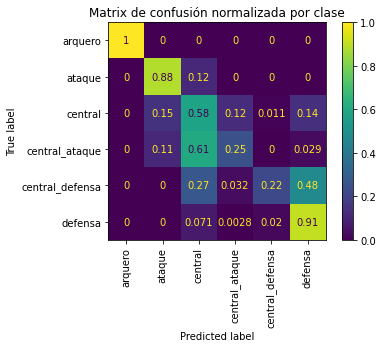

Accuracy del clasificador: 71.07 %


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from typing import Dict, Any

import matplotlib.pyplot as plt

class_pos_dict: Dict[str, List[str]] = {
    "ataque": ["ST", "CF"],
    "central_ataque": ["RW", "CAM", "LW"],
    "central": ["RM", "CM", "LM"],
    "central_defensa": ["RWB", "CDM", "LWB"],
    "defensa": ["RB", "CB", "LB"],
    "arquero": ["GK"]
}

df_player_pos: PandasDF = df_players.copy()
df_player_pos["Position_Label"] = df_player_pos["Club_Position"]
for class_name in class_pos_dict:
    df_player_pos["Position_Label"] = df_player_pos["Position_Label"].replace(
        class_pos_dict[class_name], class_name
    )
pos_label_series: PandasSeries = df_player_pos["Position_Label"]
df_player_pos: PandasDF = df_player_pos[
    pos_label_series.isin(class_pos_dict) & pos_label_series.notna()
]
df_player_pos["Position_Label"] = df_player_pos["Position_Label"].astype(
    "category"
)

print("Conteo de valores por clase:")
print(df_player_pos["Position_Label"].value_counts())

# División de train y test del nuevo dataset
y: PandasSeries = df_player_pos["Position_Label"]
X_train, X_test, y_train, y_test = train_test_split(
    df_player_pos, y, test_size=0.3, shuffle=True, stratify=y,
    random_state=1234
)

# Generación de un nuevo pipeline
pipe_knc_multiclass: Pipeline = Pipeline([
    ('preprocessing', column_transformer),
    ('KNC', KNeighborsClassifier())
])

# Entrenamiento y generación de la matriz de confusión para el clasificador
train_pipeline(pipe=pipe_knc_multiclass)
print("\nMatriz de confusión del clasificador multiclase (K-Neighbors)")
c_matrix: np.ndarray = confusion_matrix(
    y_true=y_test, y_pred=pipe_knc_multiclass.predict(X_test)
)
m_display: ConfusionMatrixDisplay = ConfusionMatrixDisplay.from_predictions(
    y_true=y_test, y_pred=pipe_knc_multiclass.predict(X_test),
    normalize="true", xticks_rotation="vertical"
)
m_display.ax_.set_title("Matrix de confusión normalizada por clase")
plt.show()

# matrix_display: ConfusionMatrixDisplay = ConfusionMatrixDisplay(
#     confusion_matrix=c_matrix,
#     display_labels=list(df_player_pos["Position_Label"].cat.categories)
# )
# matrix_display.plot(xticks_rotation="vertical")
# plt.show()
print(f"Accuracy del clasificador: "
      f"{round(100*c_matrix.trace()/c_matrix.sum(), 2)} %")

Como es posible ver, el clasificador multiclase obtiene en general resultados adecuados y un *accuracy* que permite asegurar bajo cierto margen la capacidad de clasificar para este problema y según los datos presentes de los jugadores. Naturalmente existen algunas clases que suponen mayor dificultad de detección, lo cual respecto precisamente a la superposición de los datos que conforman estas mismas clases, el principal ejemplo de confusión lo da la clase `central_ataque`, que es predicha como `central`.

## 1.3 Predicción de Sueldos [2 puntos]

<p align="center">
  <img src="https://media.giphy.com/media/3oEjHWtHAFcOKS4iA0/giphy.gif" width="460">
</p>

Queriendo ahondar aún más en el mercado del balompíe, Renacin, logra obtener (de una manera no muy formal) los sueldos de múltiples futbolistas y los guarda en el archivo ```sueldos.csv```. Con ellos les solicita que generen un regresor que les permita predecir el sueldo de los futbolistas en base a las características de los pichichis, esto, debido a su motivación por invertir y/o realizar especulación sobre los sueldos de jugadores.

Renacin es claro señalando que deben seguir utilizando la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y comenten cada uno de los pasos realizados, para obtener su regresión lineal. Señalándoles que no aceptara un $R^2$ inferior a 0.35 para el modelo solicitado.

Para esta parte usted tiene total libertad en la generación del regresor, la unica exigencia es que utilice un pipeline para generar la regresión y utilice la metrica $R^2$ para medir el rendimiento de esta.

**To-Do**:

- [X] Explique en que consiste la métrica $R^2$
- [X] Generar un pipeline para la regresión.
- [X] Obtener un regresor con un $R^2$ superior a  $0.35$.
- [X] Comente sus resultados y si es posible mejorar los resultados obtenidos. ¿Se necesitarían más datos o otros tipos de características o una combinación de ambos?

**Respuesta**

$R^2$ corresponde a una métrica de ajuste del modelo de predicción que representa el porcentaje de varianza de la variable dependiente que es explicada por el modelo; entre mayor sea el $R^2$ mejor es el modelo.

Matemáticamente se calcula como:\
$R^2 = \dfrac{\sum^{n}_{i=1} (\hat{y_i}-\bar{y})^2}{\sum^{n}_{i=1} (y_i-\bar{y})^2}$.

Donde $y_i$ es el valor real de la variable dependiente de un $x_i$ , $\hat{y_i}$ es el valor predicho e $\bar{y}$ es la media de la variable dependiente.

In [ ]:
# Construcción del dataframe
df_salaries: PandasDF = pd.read_csv("sueldos.csv").drop_duplicates(["Player"])
df_merge: PandasDF = df_salaries.merge(
    right=df_players, how="inner", left_on="Player", right_on="Name"
)

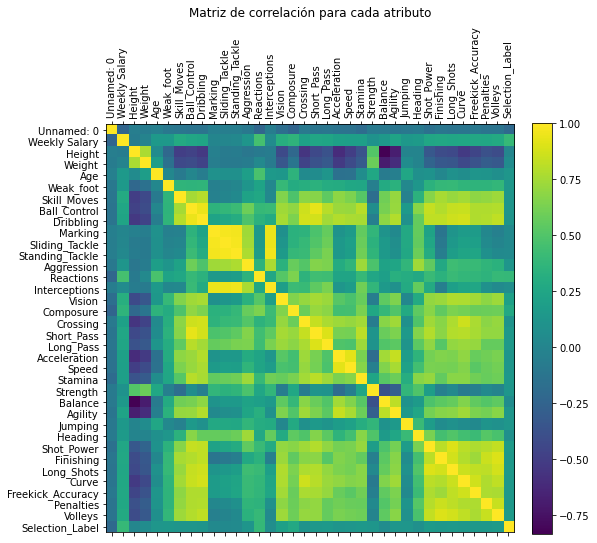

In [ ]:
# Cálculo de la matriz de correlación a modo de encontrar interacciones
# relevantes
from matplotlib.colorbar import Colorbar as pltColorBar

fig: plt.Figure = plt.figure(figsize=(8, 8))
plt.matshow(df_merge.corr(), fignum=fig.number)
numeric_selection: PandasDF = df_merge.select_dtypes(["number"])
plt.xticks(ticks=range(numeric_selection.shape[1]),
           labels=numeric_selection.columns, rotation=90)
plt.yticks(ticks=range(numeric_selection.shape[1]),
           labels=numeric_selection.columns)
plt.colorbar(fraction=0.046, pad=0.04)
plt.title("Matriz de correlación para cada atributo", y=1.25)
print()

In [ ]:
# Se añaden interacciones relevantes para variables de entrada altamente
# correlacionadas
df_merge['interaction1'] = df_merge['Freekick_Accuracy']*df_merge['Curve']
df_merge['interaction2'] = df_merge['Freekick_Accuracy']*df_merge['Long_Shots']
df_merge['interaction3'] = df_merge['Short_Pass']*df_merge['Ball_Control']
df_merge['interaction4'] = df_merge['Crossing']*df_merge['Ball_Control']
df_merge['interaction5'] = df_merge['Long_Shots']*df_merge['Ball_Control']
df_merge['interaction6'] = df_merge['Curve']*df_merge['Ball_Control']

In [ ]:
# Se crea el column transformer adecuado para este problema incluyendo las
# nuevas features (interacciones)
ohe_variables: List[str] = [
    'Preffered_Foot', 'Weak_foot', 'Skill_Moves'
]
standard_variables: List[str] = [
    'Ball_Control', 'Dribbling', 'Aggression', 'Reactions',
    'Vision', 'Composure', 'Crossing', 'Short_Pass',
    'Long_Pass', 'Acceleration', 'Speed', 'Stamina',
    'Heading', 'Shot_Power', 'Finishing', 'Long_Shots',
    'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys', 'interaction1', 
    'interaction2', 'interaction3', 'interaction4', 'interaction5',
    'interaction6'
]

column_transformer: ColumnTransformer = ColumnTransformer(transformers=[
    ('OneHotEncoder', OneHotEncoder(handle_unknown='ignore'), ohe_variables),
    ('StandardScaler', StandardScaler(), standard_variables)
])

In [ ]:
# División de train y test del nuevo dataset
y: PandasSeries = df_merge["Weekly Salary"]
X_train, X_test, y_train, y_test = train_test_split(
    df_merge, y, test_size=0.3, shuffle=True, random_state=1234
)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

#opcion 1: regresion bayesian ridge
pipe_reg: Pipeline = Pipeline([
    ('preprocessing', column_transformer),
    ("regresor", linear_model.PoissonRegressor(max_iter=10_000))
])
pipe_reg.fit(X_train, y_train)
y_pred = pipe_reg.predict(X_test)
print('R²:', r2_score(y_test, y_pred))

R²: 0.6394201258472598


Para probar distintos modelos de regresión se evalúa la correlación existente entre las distintas features y con el target. A partir de esta visualización se eliminan en ColumnTransformer las variables menos correlacionadas con el salario y se agregan al modelo interacciones entre los atributos más correlacionados entre sí.

Luego, probando distintos modelos de regresión para predecir el target (salario de los jugadores) nos encontramos con que el regresor de poisson (que es un modelo lineal generalizado con distribución de poisson) es el modelo que mejor explica la varianza de la variable dependiente ($R^2 = 63\%$).

Pese a que este es un buen rendimiento del modelo, es mejorable ya sea con otro tipo de características que también influyan en el salario de los jugadores y/o con más datos para agregar variabilidad.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media2.giphy.com/media/l1J3CbFgn5o7DGRuE/giphy.gif">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>